# Análise exploratória de dados

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
from IPython.display import display, Markdown

In [17]:
df = pd.read_csv('../data/raw/diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## 1. Descrição dos dados

![Diabetes](https://tschealth.com/wp-content/uploads/2023/06/Diabetes-Disease-1170x740.jpg)

**Diabetes prediction dataset** é um conjunto de dados médicos e demográficos de pacientes, juntamente com seu status de diabetes (positivo ou negativo). Os dados incluem características como idade, sexo, índice de massa corporal (IMC), hipertensão, doenças cardíacas, histórico de tabagismo, nível de açucar e nível de glicose no sangue. Este conjunto de dados pode ser usado para construir modelos de aprendizado de máquina para prever diabetes em pacientes com base em seu histórico médico e informações demográficas. Isto pode ser útil para os profissionais de saúde na identificação de pacientes que possam estar em risco de desenvolver diabetes e no desenvolvimento de planos de tratamento personalizados. Além disso, o conjunto de dados pode ser usado por pesquisadores para explorar as relações entre vários fatores médicos e demográficos e a probabilidade de desenvolver diabetes.

#### Dicionário dos dados:

In [21]:
dict = Path("../data/external/dictionary.csv", index = False)
dicionario = pd.read_csv(dict, sep=',')
dicionario

,variavel,descricao,tipo,subtipo
0,gender,Indica o genêro do paciente,qualitativa,nominal
1,age,Indica a idade do paciente,quantitativa,discreta
2,hypertension,Indica se o paciente possui hipertensão,quantitativa,discreta
3,heart_disease,Indica se o pacinete possui doença no coração,quantitativa,discreta
4,smoking_history,Indica informações sobre o historico de fumant...,qualitativa,nominal
5,bmi,Indica o valor do IMC(Indice de Massa Corporal...,quantitativa,contínua
6,HbA1c_level,Indica o nivel de açucar presente no sangue do...,quantitativa,contínua
7,blood_glucose_level,Indica o nivel de glicose presente no sangue d...,quantitativa,discreta
8,diabetes,Indica se o paciente possui diabetes,quantitativa,discreta


#### Dados faltantes:

In [23]:
null_counts = df.isnull().sum()

print(null_counts)

display(Markdown(
    "---\n"
    f"Sabemos assim que a não existem valores faltantes."))

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


---
Sabemos assim que a não existem valores faltantes.

In [24]:
df.describe(include='all')

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,58552,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,41.885856,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,NaN,22.516840,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,NaN,0.080000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,60.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000


Observações:

- Mulheres são a maioria no conjunto de dados;
- A idade média dos pacientes é de aproximadamente 42 anos;
- O paciente mais jovem tinha aproximadamente 1 mês de vida;
- O paciente mais velho tinha 80 anos.

---

Vamos verificar a necessidade de manter o valor "Other" da coluna "gender"

In [25]:
count = (df['gender'] == 'Other').sum() #conta a presença do valor "Other" na coluna "gender"
print(f"Número de linhas com 'other' na coluna 'gender': {count}")

Número de linhas com 'other' na coluna 'gender': 18


Sendo um valor irrisório comparado à quantidade de dados nesse dataset, removeremos os valores "Other" da coluna.

In [26]:
df = df[df['gender'] != 'Other']

---

Agora verificaremos a presença de linhas duplicadas. Considerando a variabilidade em casas decimais de algumas variáveis, podemos assumir que linhas com os mesmos valores se referem ao mesmo paciente.

In [27]:
duplicatas: int = df.duplicated().sum()
print(f"Número de duplicatas: {duplicatas}")
df = df.drop_duplicates()
display(Markdown(
    "---\n"))

Número de duplicatas: 3854


---


## 2. Perguntas de partida e hipóteses

- Existe relação entre diabetes e gênero?
- O historico de fumante do paciente tem relação com a diabetes?
- Qual a relação entre diabetes e glicose/açucar no sangue?
- Qual a correlação entre os dados?
- Existem dados faltantes, se sim quantos e em quais variáveis?
- Qual a distribuição dos dados (variável por variável)?
- Existe alguma relação entre o gênero, idade e o diagnóstico de diabetes nos pacientes?
- Existe relação entre as doenças de hipertenção, doença no coração e o dignóstico de diabetes?


## 3 Análises

### 3.1 Análises univariadas

Text(0.5, 0, '')

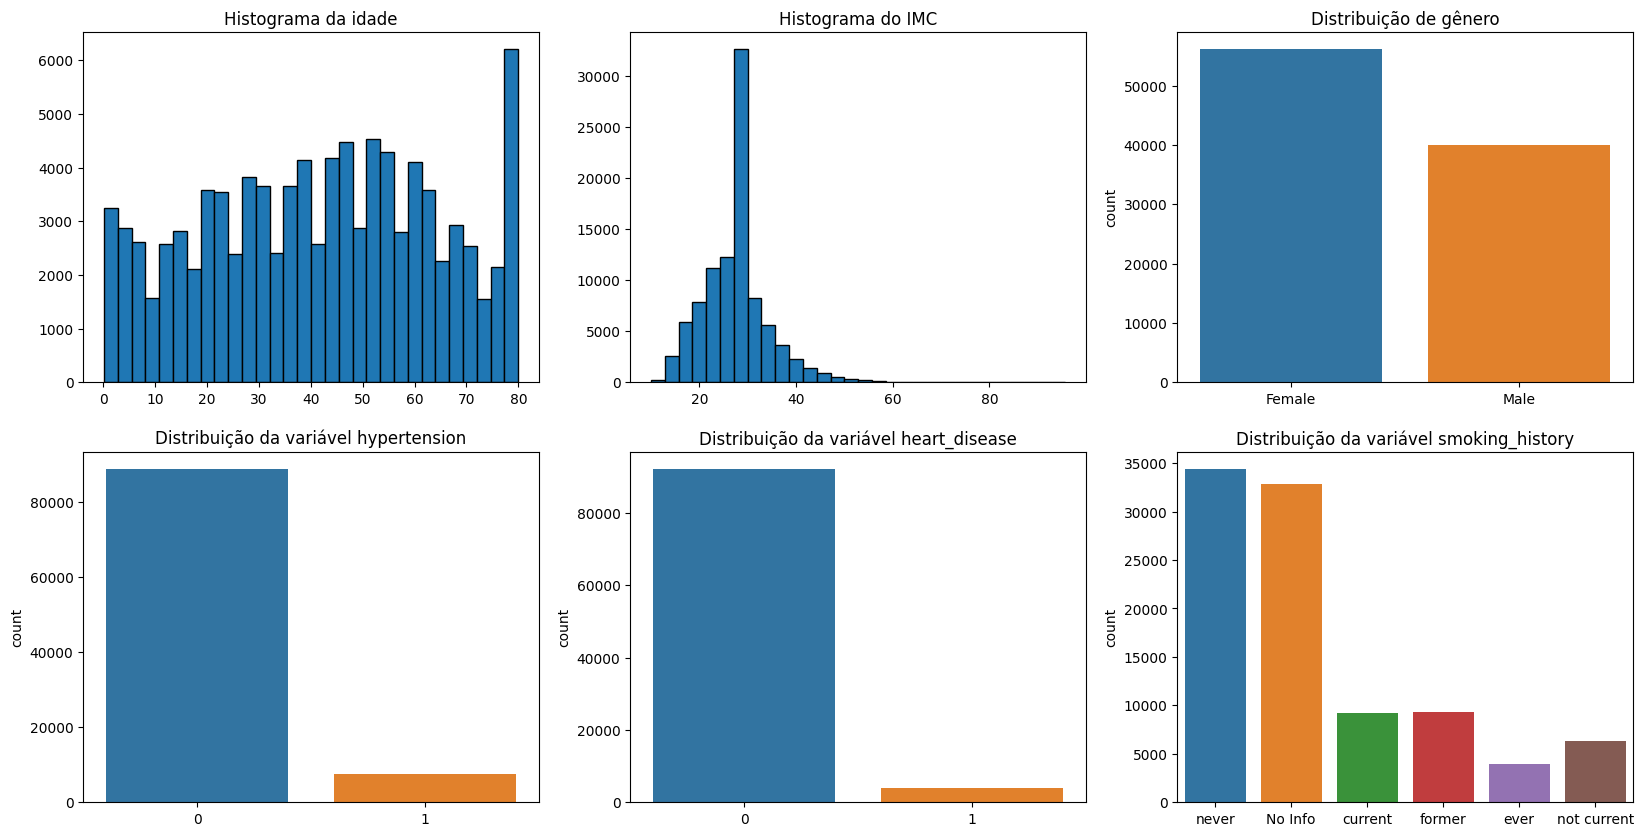

In [18]:
fig, axes = plt.subplots(2,3,figsize=(20, 10)) #cria conjunto de gráficos e define o tamanho

#historgrama da idade
ax = df['age'].hist(bins=30, ax=axes[0,0], edgecolor='black') #cria o histograma
ax.grid(False) #remove grade
ax.set_title('Histograma da idade') #adiciona título

#histograma do IMC
ax = df['bmi'].hist(bins=30, ax=axes[0,1], edgecolor='black')
ax.grid(False)
ax.set_title('Histograma do IMC')

# gráfico da distribuição de gênero
sns.countplot(x='gender',data=df, ax=axes[0,2]) #cria o gráfico
axes[0,2].set_title('Distribuição de gênero') # adiciona título
axes[0,2].set_xlabel('')  #remove a legenda inferior

# Gráfico da variável hypertension
sns.countplot(x='hypertension',data=df, ax=axes[1,0])
axes[1,0].set_title('Distribuição da variável hypertension')
axes[1,0].set_xlabel('')


# Gráfico da variável heart_disease
sns.countplot(x='heart_disease',data=df, ax=axes[1,1])
axes[1,1].set_title('Distribuição da variável heart_disease')
axes[1,1].set_xlabel('')

# Gráfico da variável smoking_history
sns.countplot(x='smoking_history',data=df, ax=axes[1,2])
axes[1,2].set_title('Distribuição da variável smoking_history')
axes[1,2].set_xlabel('')

#### Observações:

- A grande maioria dos paciente tem cerca de 80 anos;

- A grande maioria dos pacientes possui IMC em torno de 30;

- A maioria dos pacientes é composta por mulheres;

- A grande maioria dos pacientes observados não possuia hipertensão ou doeça do coração, porém hipertensão é mais frequente;

- A grande maioria não tem histórico de tabagismo.

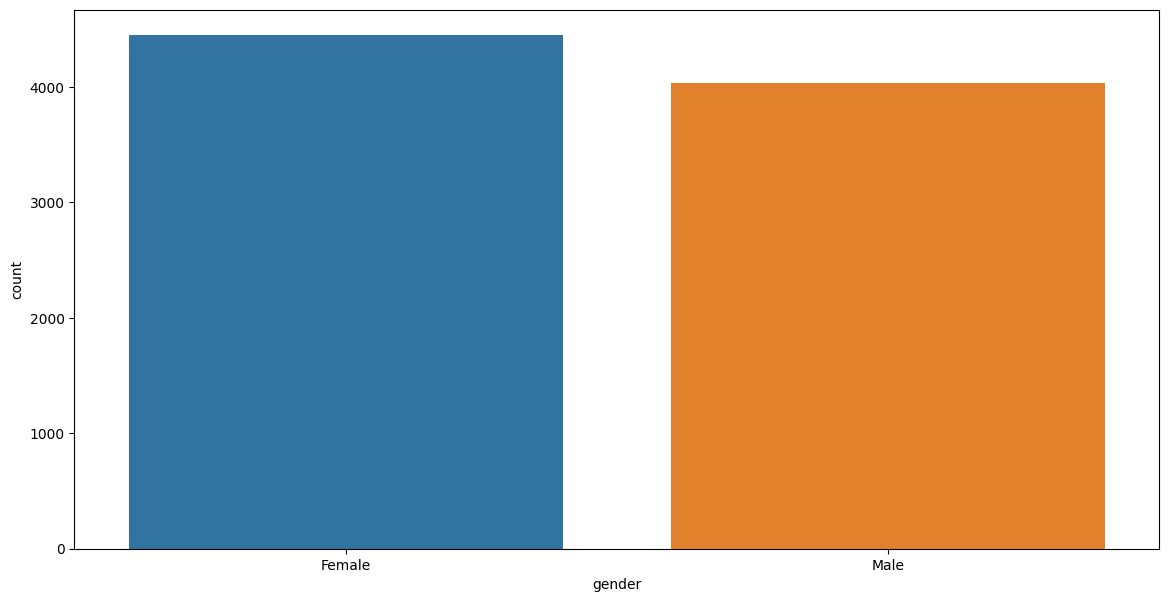

In [11]:
#cria gráfico relacionando genero e diabetes
plt.figure(figsize=(14,7))
df_diabetes = df[df['diabetes'] == 1]
sns.countplot(x='gender',data=df_diabetes)
plt.show()

---

- A quantidade de mulheres diabéticas é levemente superior a de homens.

---

### 3.2 Análise bivariada

/home/paulo/equipe2-2024.2/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


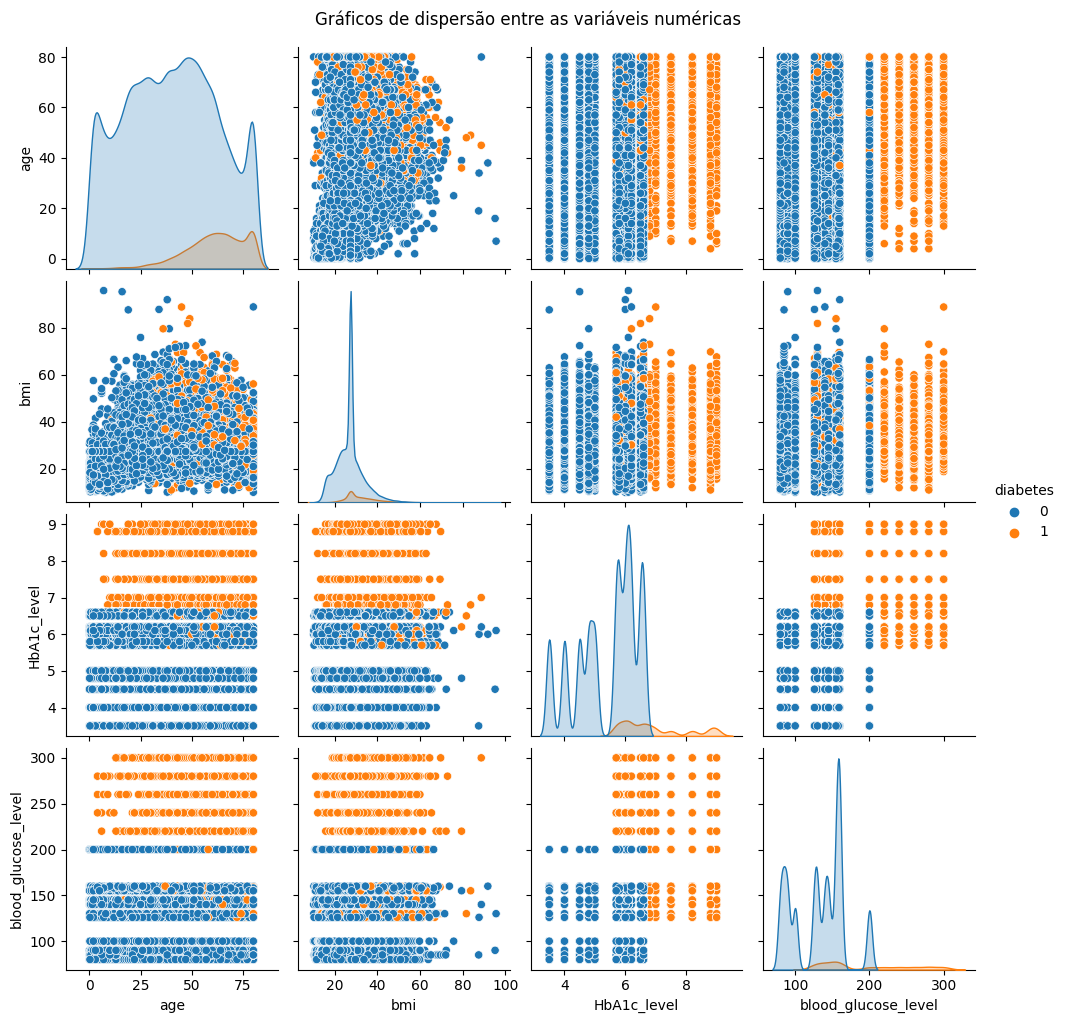

In [11]:
# Gráficos de dispersão entre variáveis numéricas
num_vars = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','diabetes'] #seleciona apenas as variáveis numéricas
sns.pairplot(df[num_vars], hue='diabetes') #cria uma matriz de gráficos de dispersão
plt.suptitle('Gráficos de dispersão entre as variáveis numéricas',y=1.02)
plt.show()

#### Observações:

- Todos os indivíduos com o nível de glicose no sangue acima de 200 são considerados diabéticos;
- Dos diabéticos que registraram glicose abaixo de 200, a maioria é composta por indívidos acima de 50 anos;
- Indivíduos com idade superior a 30 anos aparentam estar mais suscetíveis a apresentar diabetes mesmo com IMC inferior a 40;
- Observamos indivíduos diabéticos com glicose controlada porém com níveis de hemoglobina glicada altos. 

Text(0, 0.5, 'glicose no sangue')

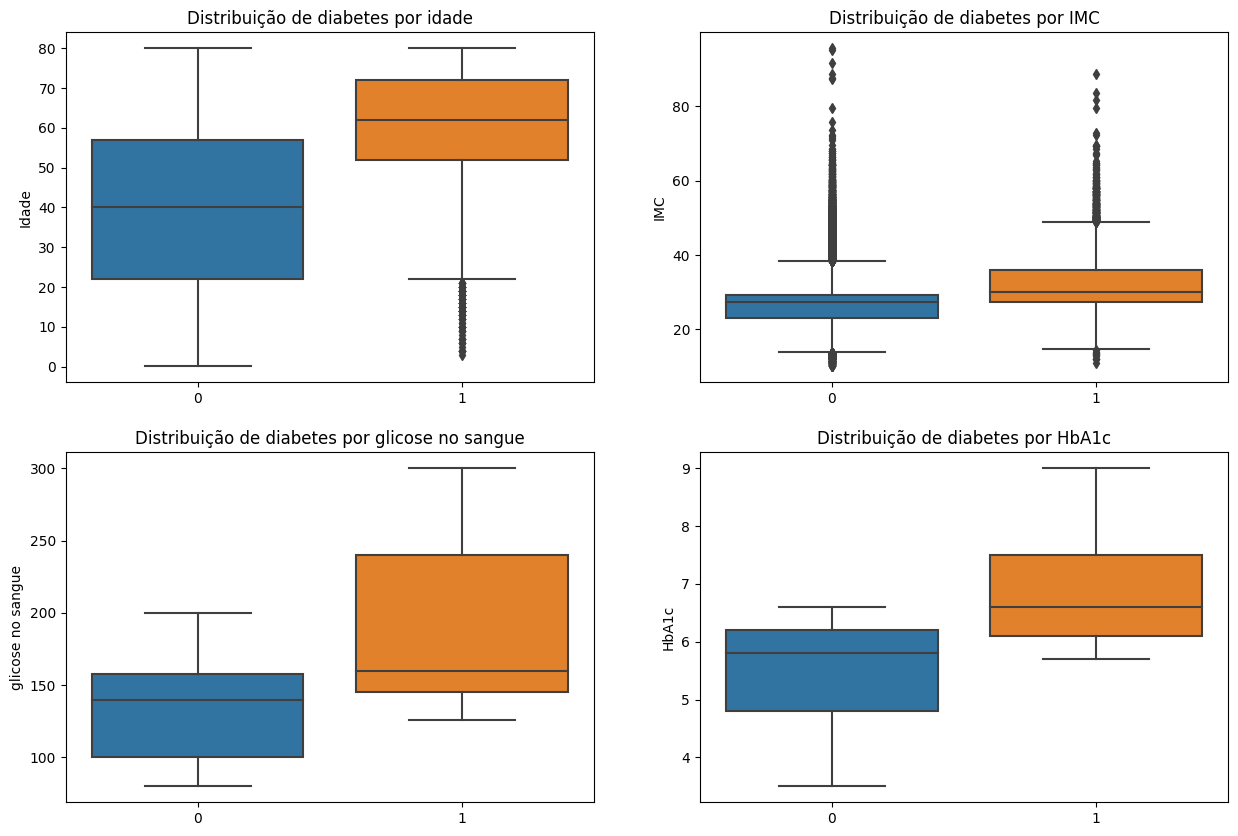

In [13]:
fig, axes = plt.subplots(2,2,figsize=(15, 10)) #cria conjunto de gráficos e define o tamanho


#boxplot de diabetes por idade
sns.boxplot(x='diabetes', y='age', data=df,ax = axes[0,0]) #cria o gráfico
axes[0,0].set_title('Distribuição de diabetes por idade') #adiciona título
axes[0,0].set_xlabel('') #remove legenda inferior
axes[0,0].set_ylabel('Idade')

#boxplot de diabetes por IMC
sns.boxplot(x='diabetes',y='bmi', data=df,ax = axes[0,1])
axes[0,1].set_title('Distribuição de diabetes por IMC')
axes[0,1].set_xlabel('')
axes[0,1].set_ylabel('IMC')

#boxplot de HbA1c por diabetes
sns.boxplot(x='diabetes',y='HbA1c_level', data=df,ax = axes[1,1])
axes[1,1].set_title('Distribuição de diabetes por HbA1c')
axes[1,1].set_xlabel('')
axes[1,1].set_ylabel('HbA1c')

#boxplot de diabetes por glicose no sangue
sns.boxplot(x='diabetes',y='blood_glucose_level', data=df,ax = axes[1,0])
axes[1,0].set_title('Distribuição de diabetes por glicose no sangue')
axes[1,0].set_xlabel('')
axes[1,0].set_ylabel('glicose no sangue')

#### Observações:

- Pacientes com maior IMC aparentam estar mais propícios a apresentar diabetes;

- Todos os pacientes diabéticos tinham glicose no sangue acima de 100;

- Muitos pacientes com níveis de glicose e hemoglobina glicada altas não foram considerados diabéticos;

- Os níveis de hemoglobina glicada em diabéticos foram mais concentrados entre 6% e 8%;

### 3.3 Análises multivariadas

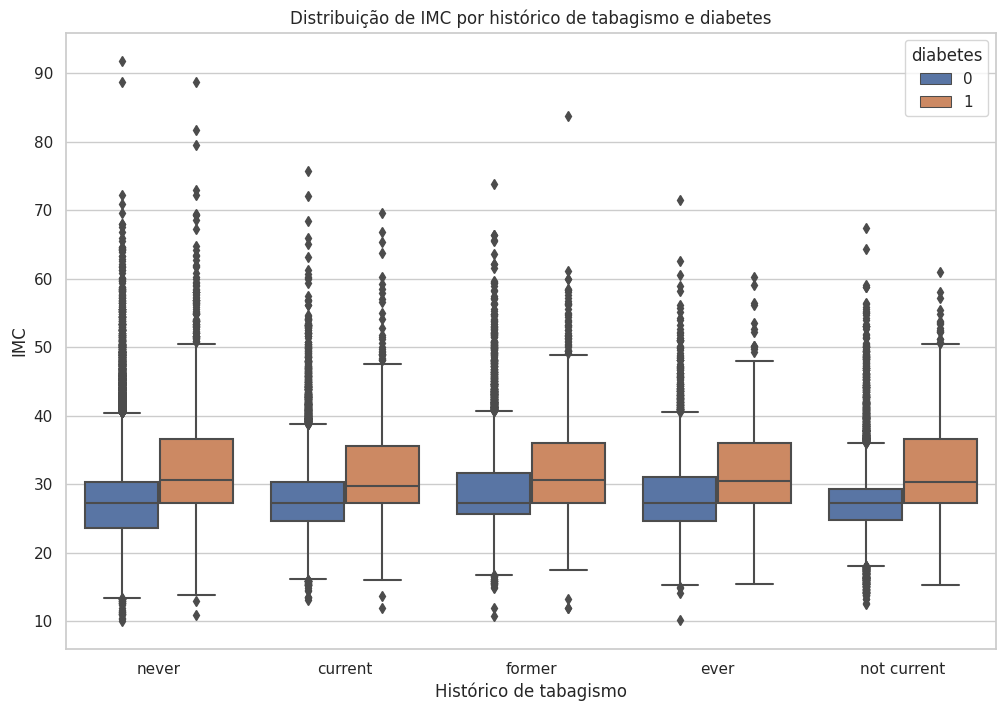

In [43]:
#boxplots do IMC por histórico de tabagismo 
plt.figure(figsize=(12, 8)) #cria figura
sns.boxplot(x='smoking_history', y='bmi', hue='diabetes', data=df[df['smoking_history'] != 'No Info']) #Cria o gráfico sem o valor "no info" para a variável smoking_history
plt.title('Distribuição de IMC por histórico de tabagismo e diabetes')
plt.xlabel('Histórico de tabagismo') 
plt.ylabel('IMC')
plt.show()

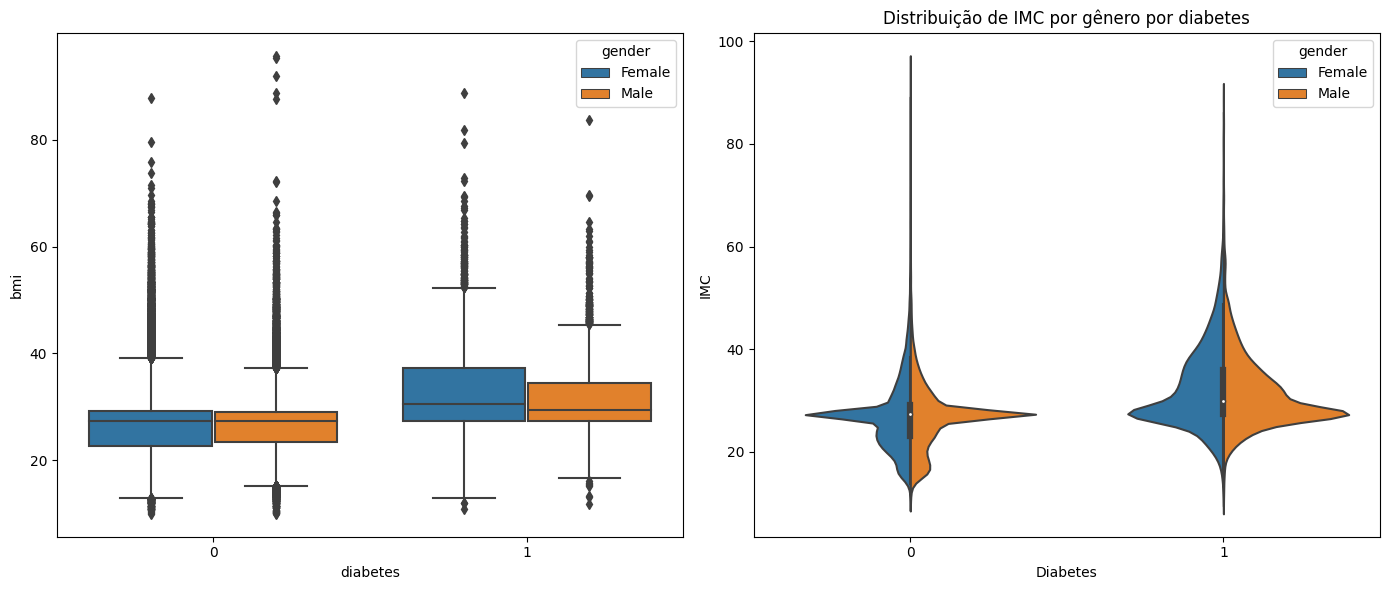

In [31]:
#boxplots de IMC por gênero por diabetes
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
#criando gráfico de boxplot
sns.boxplot(x='diabetes', y='bmi', hue='gender',ax=axs[0], data=df)
axs[1].set_title('Distribuição de IMC por gênero por diabetes')
axs[1].set_xlabel('Diabetes')
axs[1].set_ylabel('IMC')
#criando gráfico de violino (não visto em aula)
sns.violinplot(x='diabetes', y='bmi', hue='gender', ax=axs[1], data=df, split=True)
axs[1].set_title('Distribuição de IMC por gênero por diabetes')
axs[1].set_xlabel('Diabetes')
axs[1].set_ylabel('IMC')

plt.tight_layout()
plt.show()

### Observações:

- Não parece haver relação entre tabagismo e o diagnóstico de diabetes;
- Em geral, a tendência é de um IMC ligeiramente maior em mulheres diabéticas em comparação com homens diabéticos, sugerindo que a diabetes pode influenciar de maneira diferente o peso corporal de acordo com o gênero. 

### 3.4 Correlação

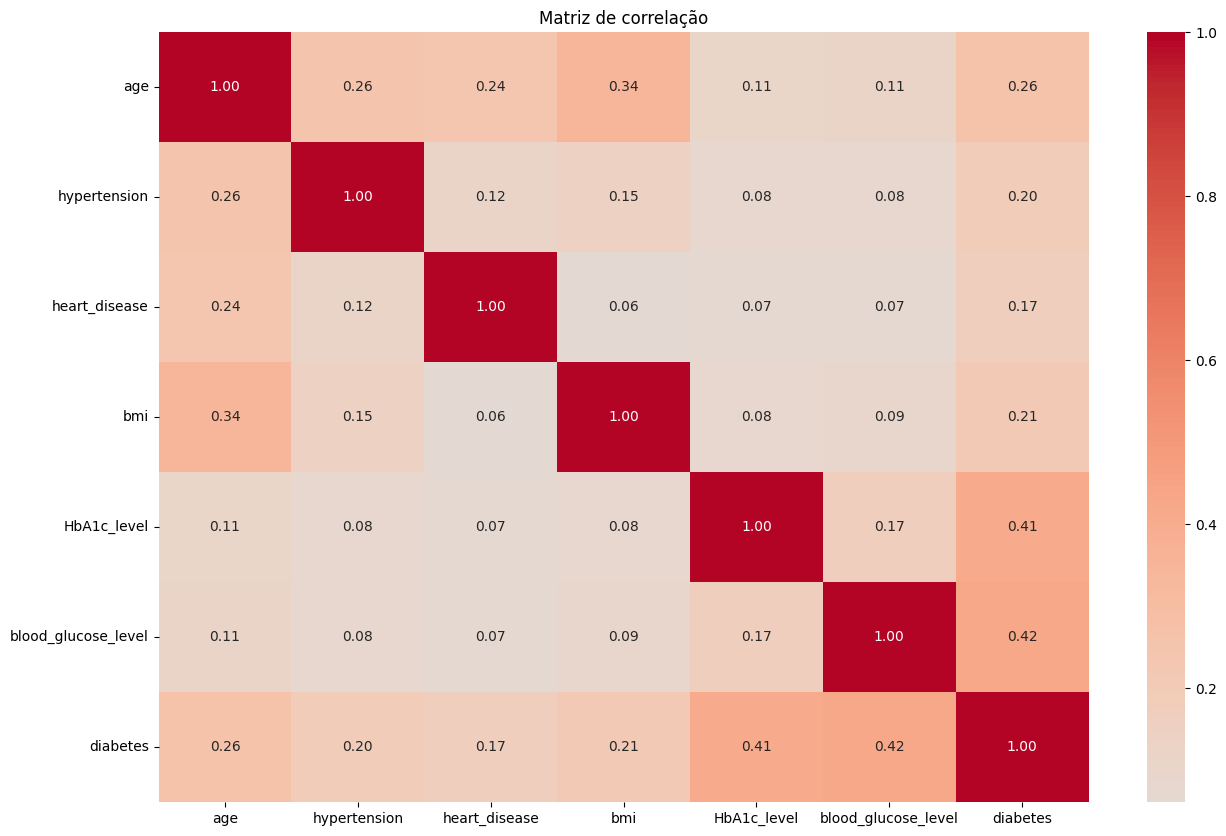

In [27]:
var_quantitativas = df.select_dtypes(include=['int','float']) #seleciona as variáveis quantitativas
matriz_correlacao = var_quantitativas.corr() #cria a matriz de correlação
plt.figure(figsize=(15, 10))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm',center=0, fmt=".2f") #cria o heatmap para visualização da matriz
plt.title('Matriz de correlação')
plt.show()

#### Observações:

- Os maiores índices de correlação com a diabetes são, respectivamente, blood_glucose_level com 42% e HbA1c_level com 40%;
- Os menores índices de correlação com a diabetes são, respectivamente, heart_disease com 17% e hypertension com 20%;
- Moderada correlação entre a idade e o diagnóstico de diabetes;
- Observamos também correlação significativa entre o IMC do paciente e o diagnóstico de diabetes.

## 3. Insights

#### Com essas análises obtivemos os seguintes insights:

- Apesar de termos mais mulheres diabéticas do que homens diabéticos proporcionalmente, temos 7,61% de mulheres diabéticas e 9,75% de homens diabéticos;

- Não observamos relação significativa entre o histórico de tabagismo e o dignóstico de diabetes;

- Todos os indivíduos com o nível de glicose no sangue acima de 200 são considerados diabéticos;

- As maiores correlações associadas ao diagnóstico positivo de diabetes foram das variáveis nível de glicose, hemoglobina glicada, idade e IMC, respectivamente;

- Mulheres diabéticas apresentaram IMC levemente maior que dos homens diabéticos, com maior variabilidade e limite superior maior;

- Indivíduos com idade superior a 30 anos aparentam estar mais suscetíveis a apresentar diabetes.

- Não foram constatadas relações significativas entre doenças do coração e hipertenção quanto ao diagnóstico de diabetes.